In [2]:
# Importar librerías
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

url = 'https://raw.githubusercontent.com/gabrielroncancio/machine_learning/main/data/bomberos_multiclase_5000_2.csv'
df = pd.read_csv(url, sep=",", header=0)
df.head()

,id_llamada,fecha,distrito,duracion_minutes,recursos_desplegados,distancia_km,tipo,Accidente,Neutral,Fuego
0,1,2/05/2025 2:37,Norte,162,5,18,Accidente,1,0,0
1,2,27/02/2025 10:32,Sur,155,9,18,Neutral,0,1,0
2,3,7/12/2024 1:47,Oeste,148,8,1,Fuego,0,0,1
3,4,31/05/2025 8:24,Sur,18,8,14,Fuego,0,0,1
4,5,10/11/2024 5:40,Sur,75,5,8,Fuego,0,0,1


In [3]:
df.dtypes

id_llamada               int64
fecha                   object
distrito                object
duracion_minutes         int64
recursos_desplegados     int64
distancia_km             int64
tipo                    object
Accidente                int64
Neutral                  int64
Fuego                    int64
dtype: object

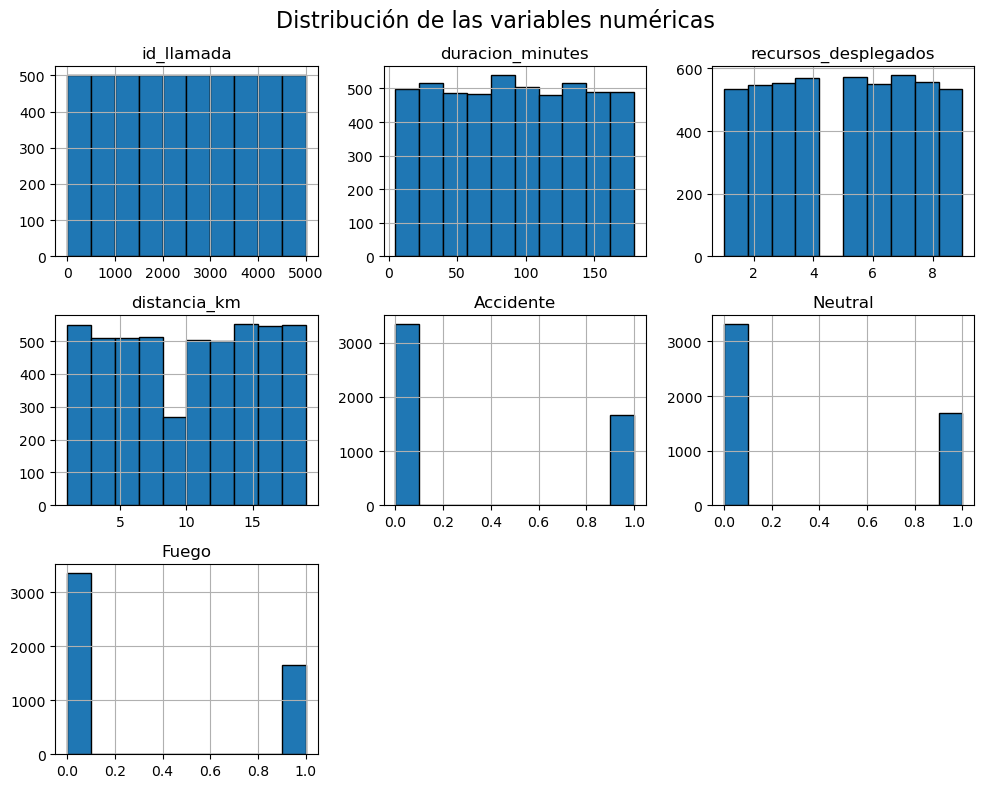

In [4]:
# Histograma general
df.hist(figsize=(10, 8), edgecolor='black')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

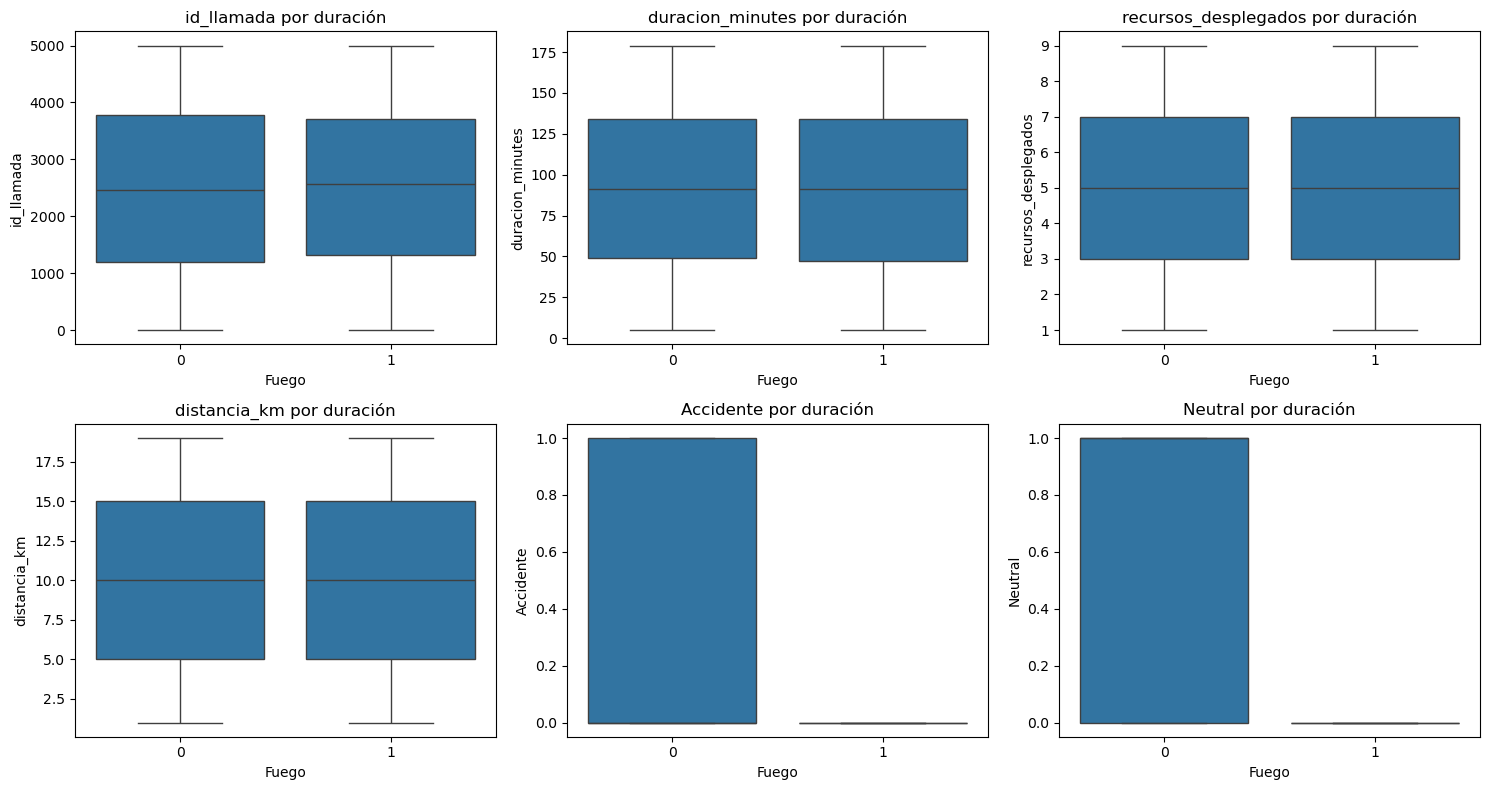

In [6]:
cols = df.select_dtypes(include='number').columns[:-1]
n = len(cols)

# Calcular tamaño de la grilla
ncols = 3
nrows = math.ceil(n / ncols)

plt.figure(figsize=(5 * ncols, 4 * nrows))

for i, col in enumerate(cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x='Fuego', y=col, data=df)
    plt.title(f"{col} por duración")

plt.tight_layout()
plt.show()

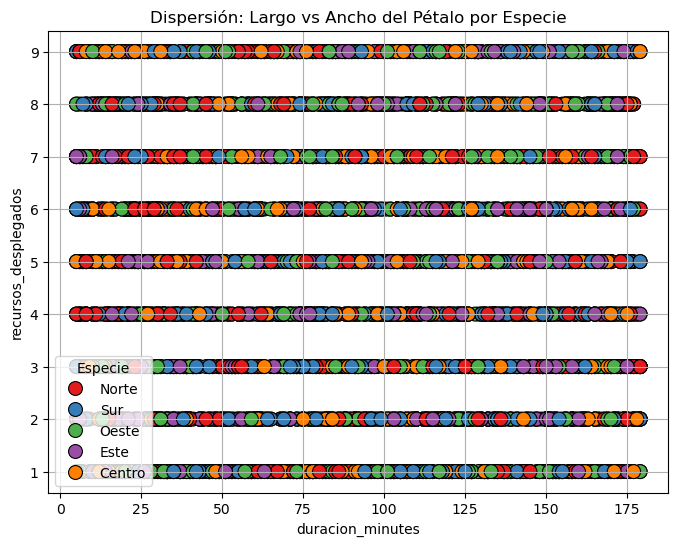

In [17]:
# Gráfico de dispersión: largo vs ancho del pétalo
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="duracion_minutes",
    y="recursos_desplegados",
    hue="distrito",
    palette="Set1",
    s=100,
    edgecolor="black"
)
plt.title("Dispersión: Largo vs Ancho del Pétalo por Especie")
plt.xlabel("duracion_minutes")
plt.ylabel("recursos_desplegados")
plt.legend(title="Especie")
plt.grid(True)
plt.show()

## Paso 2: Simular una división del nodo
Dividiremos el nudo usando el atributo longitud del pétalo < 2.5 :

In [23]:
# División arbitraria: petal length < 2.45
grupo_izq = df[df['duracion_minutes'] < 30]
grupo_der = df[df['duracion_minutes'] >= 30]

print("Tamaño del grupo izquierdo:", len(grupo_izq))
print("Tamaño del grupo derecho:", len(grupo_der))

Tamaño del grupo izquierdo: 720
Tamaño del grupo derecho: 4280


### ✅ Paso 3: Calcular el Índice Gini para cada grupo

Usamos la siguiente **fórmula del índice Gini**:

$$
\text{Gini} = 1 - \sum_{i=1}^{k} p_i^2
$$

Donde:

- \( p_i \) es la **proporción de la clase \( i \)** en el grupo.
- \( k \) es el número total de clases en ese grupo.





In [ ]:
def calcular_gini(grupo):
    clases = grupo['target'].value_counts(normalize=True)
    gini = 1 - np.sum(clases**2)
    return gini

gini_izq = calcular_gini(grupo_izq)
gini_der = calcular_gini(grupo_der)

print(f"Gini Izquierdo: {gini_izq:.4f}")
print(f"Gini Derecho: {gini_der:.4f}")

### ✅ Paso 4: Calcular el Gini ponderado total

La fórmula para el Gini total de la división es:

$$
\text{Gini}_{\text{división}} =
\frac{n_{\text{izq}}}{n_{\text{total}}} \cdot \text{Gini}_{\text{izq}} +
\frac{n_{\text{der}}}{n_{\text{total}}} \cdot \text{Gini}_{\text{der}}
$$


Donde:

$$
n_{\text{izq}} \quad \text{: número de muestras en el grupo izquierdo}
$$

$$
n_{\text{der}} \quad \text{: número de muestras en el grupo derecho}
$$

$$
n_{\text{total}} = n_{\text{izq}} + n_{\text{der}} \quad \text{: total de muestras}
$$

$$
\text{Gini}_{\text{izq}} \quad \text{: índice Gini del grupo izquierdo}
$$

$$
\text{Gini}_{\text{der}} \quad \text{: índice Gini del grupo derecho}
$$


Este valor representa la **impureza ponderada** de la división.  
Un valor más bajo indica que los subgrupos son más puros y, por tanto, la división es mejor.







In [ ]:
n_total = len(df)
n_izq = len(grupo_izq)
n_der = len(grupo_der)

gini_total = (n_izq / n_total) * gini_izq + (n_der / n_total) * gini_der
print(f"Gini ponderado total de la división: {gini_total:.4f}")

### ✅ Cálculo de la Entropía ponderada total

La entropía mide la impureza de un grupo, y se calcula con la fórmula:

$$
\text{Entropía} = - \sum_{i=1}^{k} p_i \cdot \log_2(p_i)
$$

Donde:

- \( p_i \): proporción de la clase \( i \) dentro del grupo.  
- \( k \): número total de clases.  

Cuando se divide un nodo en dos grupos (izquierdo y derecho), se calcula la entropía ponderada así:

$$
\text{Entropía}_{\text{división}} =
\frac{n_{\text{izq}}}{n_{\text{total}}} \cdot \text{Entropía}_{\text{izq}} +
\frac{n_{\text{der}}}{n_{\text{total}}} \cdot \text{Entropía}_{\text{der}}
$$

Donde:

$$
n_{\text{izq}} \quad \text{: número de muestras en el grupo izquierdo}
$$

$$
n_{\text{der}} \quad \text{: número de muestras en el grupo derecho}
$$

$$
n_{\text{total}} = n_{\text{izq}} + n_{\text{der}} \quad \text{: total de muestras}
$$

$$
\text{Entropía}_{\text{izq}} \quad \text{: entropía del grupo izquierdo}
$$

$$
\text{Entropía}_{\text{der}} \quad \text{: entropía del grupo derecho}
$$



In [ ]:

# 2. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

# 3. Crear y entrenar el modelo
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)  # criterion='entropy'
clf.fit(X_train, y_train)

# 4. Evaluar el modeloz
y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=target_names))


In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Dataset Iris")
plt.show()

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parametros = {
    'max_depth': [2, 3, 4, 5],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), parametros, cv=5)
grid.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid.best_params_)



In [ ]:
# 5. Crear DataFrame con resultados
df_resultados = pd.DataFrame(X_test, columns=feature_names)
df_resultados["Clase real"] = [target_names[i] for i in y_test]
df_resultados["Clase predicha"] = [target_names[i] for i in y_pred]

In [ ]:
# 6. Exportar a Excel
df_resultados.to_excel("resultados_iris.xlsx", index=False)

In [ ]:
df["Clase predicha"]= clf.predict(X)

df["Clase predicha"]=[target_names[i] for i in y]

In [ ]:
df.head()

df.to_excel("resultados_iris_full.xlsx", index=False)